### Majid Feiz 
### Visualization of Hypothesis Testing and Network

#### Part 1: P value in hypothesis testin

#### Step 1

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [134]:
Data_File_Path ='C:/Users/Owner/Documents/Majid/UConn/Data_Visualization/Data_file'
df = pd.read_csv(Data_File_Path + '/GSE44768_CR_40_54_Combined.csv')
#df.head()

In [135]:
#alz_f = [i for i in df.GSM_ID if 'alz_f' in i] or alternatively you can use contains
alz_f =  df[df.GSM_ID.str.contains('alz_f')]
nd_f  =  df[df.GSM_ID.str.contains('nd_f')]
alz_m =  df[df.GSM_ID.str.contains('alz_m')]
nd_m  =  df[df.GSM_ID.str.contains('nd_m')]

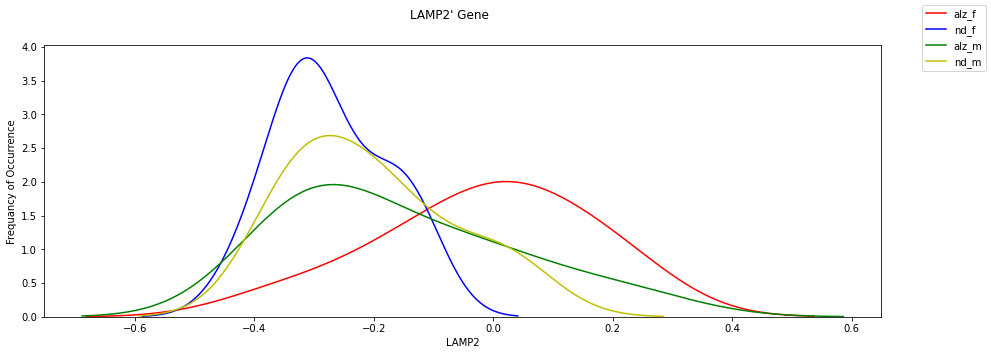

In [136]:

fig, axes = plt.subplots(figsize=(15, 5), sharey=True)
fig.suptitle("LAMP2' Gene")

from scipy.stats import norm
#sn.distplot(df, hist=False, color='r', rug=True, fit=norm);

#sn.distplot(x=alz_f.LAMP2, kde=True, label='alz_f',  color='b' ).legend()
#sn.distplot(x=nd_f.LAMP2, kde=True,  label='nd_f',   color='r').legend()
#sn.distplot(x=alz_m.LAMP2, kde=True, label='alz_m',  color='g').legend()
#sn.distplot(x=nd_m.LAMP2, kde=True,  label='nd_m',   color='y').legend()

sn.distplot(alz_f.LAMP2, hist=False, color='r', label='alz_f',rug=False);#fit=norm
sn.distplot(nd_f.LAMP2, hist=False, color='b', label='nd_f',rug=False);#fit=norm
sn.distplot(alz_m.LAMP2, hist=False, color='g',label='alz_m' ,rug=False);#fit=norm
sn.distplot(nd_m.LAMP2, hist=False, color='y', label ='nd_m' ,rug=False);#fit=norm
fig.legend()


axes.set_xlabel('LAMP2')
axes.set_ylabel('Frequancy of Occurrence')
plt.show()

In [137]:
from scipy.stats import ttest_ind
def p_value(x,y):
    a , b = ttest_ind(x, y, equal_var=False)
    return b

def pvalue_vector(str_items, str_gene_name):
    dic  = {}
    for i in range(len(items)):
        for j in range(i+1,len(items)):
            dic[items[i]+' vs. '+items[j]] = p_value(eval(items[i]).eval(str_gene_name), eval(items[j]).eval(str_gene_name))
    return dic                                               

items = ['nd_f', 'alz_f', 'nd_m', 'alz_m']
gene_name = 'LAMP2'
dic = pvalue_vector(items, gene_name)
gg = pd.DataFrame.from_dict(dic, orient='index', columns =['P Value']) #.set_index('xxx') row=['a','b','c','d','e','f'] orient='index',
gg.index.name = 'Gene Comparison Group'
gg.reset_index(['Gene Comparison Group'], inplace = True)
gg['ID']=['a','b','c','d','e','f']
gg.set_index('ID', inplace = True)
gg[r"Significance Level $\alpha$"] = 0.05
gg[r'Hypothesis $H0$'] = np.where(gg.iloc[:,1] > 0.05, r'Failed to Reject H$_0$', r'Reject H$_0$' )
# alternatively you could use def with apply function in pd
gg


,Gene Comparison Group,P Value,Significance Level $\alpha$,Hypothesis $H0$
ID,,,,
a,nd_f vs. alz_f,0.001163,0.05,Reject H$_0$
b,nd_f vs. nd_m,0.202223,0.05,Failed to Reject H$_0$
c,nd_f vs. alz_m,0.104546,0.05,Failed to Reject H$_0$
d,alz_f vs. nd_m,0.015606,0.05,Reject H$_0$
e,alz_f vs. alz_m,0.107113,0.05,Failed to Reject H$_0$
f,nd_m vs. alz_m,0.519592,0.05,Failed to Reject H$_0$


##### Pre Step2

In [138]:
#creat new df2 from df (or by concating) to keep the original data untacked.
# Chaning the GSM_ID to 4 categroy of [nd_f, alz_f, nd_m, alz_m]
df2=pd.concat([nd_f, alz_f, nd_m, alz_m])
for i in range(len(df2.GSM_ID)):
    if 'alz_f' in df2.GSM_ID.iloc[i]:
        df2.GSM_ID.iloc[i] = 'alz_f'
    elif 'nd_f' in df2.GSM_ID.iloc[i]:
        df2.GSM_ID.iloc[i] = 'nd_f'
    elif 'alz_m' in df2.GSM_ID.iloc[i]:
        df2.GSM_ID.iloc[i] = 'alz_m'
    elif 'nd_m' in df2.GSM_ID.iloc[i]:
        df2.GSM_ID.iloc[i] = 'nd_m'  
df2=df2.sort_index();
#df2

#### Step 2

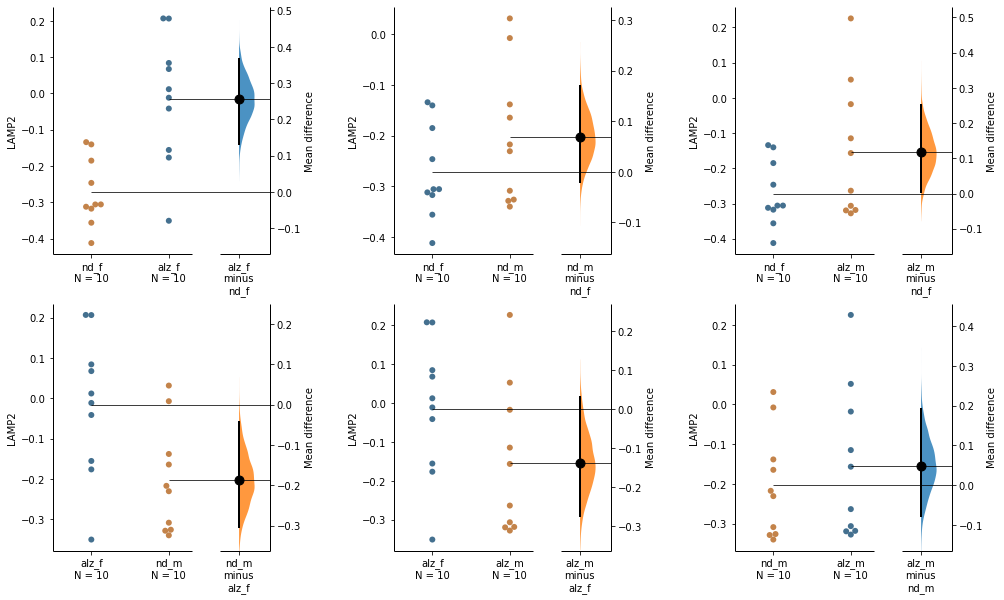

In [139]:
#two_groups_unpaired = dabest.load(df2, idx=("LAMP2", "Test 1")) #resamples=5000
import dabest
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3),(0,0))
dm_dabest = dabest.load(df2, x="GSM_ID", y="LAMP2",  idx=("nd_f", "alz_f"))
dm_dabest.mean_diff.plot(ax=ax1);

ax2 = plt.subplot2grid((2,3),(0,1))
dm_dabest = dabest.load(df2, x="GSM_ID", y="LAMP2",  idx=("nd_f", "nd_m"))
dm_dabest.mean_diff.plot(ax=ax2);

ax3 = plt.subplot2grid((2,3),(0,2))
dm_dabest = dabest.load(df2, x="GSM_ID", y="LAMP2",  idx=("nd_f", "alz_m"))
dm_dabest.mean_diff.plot(ax=ax3);

ax4 = plt.subplot2grid((2,3),(1,0))
dm_dabest = dabest.load(df2, x="GSM_ID", y="LAMP2",  idx=("alz_f", "nd_m"))
dm_dabest.mean_diff.plot(ax=ax4);

ax5 = plt.subplot2grid((2,3),(1,1))
dm_dabest = dabest.load(df2, x="GSM_ID", y="LAMP2",  idx=("alz_f", "alz_m"))
dm_dabest.mean_diff.plot(ax=ax5);

ax6 = plt.subplot2grid((2,3),(1,2))
dm_dabest = dabest.load(df2, x="GSM_ID", y="LAMP2",  idx=("nd_m", "alz_m"))
dm_dabest.mean_diff.plot(ax=ax6);

plt.subplots_adjust(wspace=1.2)#hspace=0.6


#### Step 3

In [140]:
P_value_sort = gg.sort_values('P Value')
P_value_sort['Point Number'] = [i for i in range(1,7)]
P_value_sort

,Gene Comparison Group,P Value,Significance Level $\alpha$,Hypothesis $H0$,Point Number
ID,,,,,
a,nd_f vs. alz_f,0.001163,0.05,Reject H$_0$,1
d,alz_f vs. nd_m,0.015606,0.05,Reject H$_0$,2
c,nd_f vs. alz_m,0.104546,0.05,Failed to Reject H$_0$,3
e,alz_f vs. alz_m,0.107113,0.05,Failed to Reject H$_0$,4
b,nd_f vs. nd_m,0.202223,0.05,Failed to Reject H$_0$,5
f,nd_m vs. alz_m,0.519592,0.05,Failed to Reject H$_0$,6


#### Part a and b

Largest K below red line =  2.0
P value BH corected =  0.015605589934773088


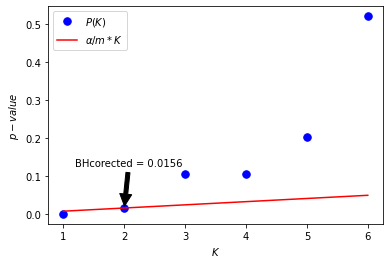

In [141]:
#x=np.arange(1,7,1)
x = P_value_sort['Point Number']
def plt1():
    plt.plot(x,P_value_sort['P Value'], 'b.',markersize=15, label = r'$P(K)$')

    k = len(x)
    m = alpha = 0.05
    y_ = m/k*x
    PvalueBHcor = P_value_sort['P Value'].where(P_value_sort['P Value'].lt(y_)).max()
    Max_K_below_redline = x.where(P_value_sort['P Value'].lt(y_)).max()
    print('Largest K below red line = ', Max_K_below_redline)
    print('P value BH corected = ', PvalueBHcor)
    plt.plot(x, y_, 'r', label = r'$\alpha/m * K$')
    plt.annotate('BHcorected = {0:0.4F}'.format(PvalueBHcor), (x[1], y_[1]),
                xytext=(0.4, 0.3), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=10,
                horizontalalignment='right', verticalalignment='top')
    plt.xlabel('$\it{K}$');plt.ylabel('$\it {p-value}$')
    plt.legend();
    return (x,y_)

x, y_ = plt1()

#### Part c

In [142]:
Max_K_below_redline = x.where(P_value_sort['P Value'].lt(y_)).max()
print('Largest K below red line = ', Max_K_below_redline)

Largest K below red line =  2.0


#### Part d

In [143]:
Pvalue_lower_than_BH = P_value_sort['P Value'].where(P_value_sort['P Value'].lt(y_)).dropna()
Pvalue_lower_than_BH

ID
a    0.001163
d    0.015606
Name: P Value, dtype: float64

#### Part e

Largest K below red line =  2.0
P value BH corected =  0.015605589934773088


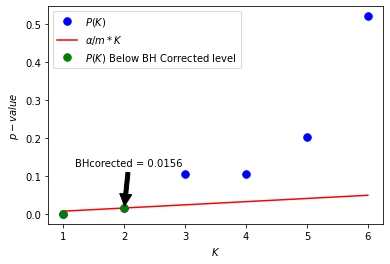

In [144]:
plt1()
plt.plot(x[0:len(Pvalue_lower_than_BH)], Pvalue_lower_than_BH, 'g.',markersize=15, label = r'$P(K)$ Below BH Corrected level')
plt.legend();

In [145]:
#gg['P value BH corected'] = Pvalue_lower_than_BH
P_value_sort[r'Hypothesis $H0$ Based on BH corr'] = np.where(P_value_sort.iloc[:,1] >= max(Pvalue_lower_than_BH), r'Failed to Reject H$_0$', r'Reject H$_0$' )
# alternatively you could use def with apply function in pd
P_value_sort.rename(columns={r'Hypothesis $H0$': r'Hypothesis $H0$ based on $\alpha$ = 0.05'}, inplace=True)
P_value_sort


,Gene Comparison Group,P Value,Significance Level $\alpha$,Hypothesis $H0$ based on $\alpha$ = 0.05,Point Number,Hypothesis $H0$ Based on BH corr
ID,,,,,,
a,nd_f vs. alz_f,0.001163,0.05,Reject H$_0$,1,Reject H$_0$
d,alz_f vs. nd_m,0.015606,0.05,Reject H$_0$,2,Failed to Reject H$_0$
c,nd_f vs. alz_m,0.104546,0.05,Failed to Reject H$_0$,3,Failed to Reject H$_0$
e,alz_f vs. alz_m,0.107113,0.05,Failed to Reject H$_0$,4,Failed to Reject H$_0$
b,nd_f vs. nd_m,0.202223,0.05,Failed to Reject H$_0$,5,Failed to Reject H$_0$
f,nd_m vs. alz_m,0.519592,0.05,Failed to Reject H$_0$,6,Failed to Reject H$_0$


#### Step 4

Do Hierarchical clustering and Gardner-Altman estimation plots show the similar analysis results:\
Clustering and Gardner-Altman estimation show the same results when rejecting the hypothesis cases. In other words, the clustering divides well the two populations that are different and matched to Gardner-Altman's estimation. However, clustering was not clearly shown for those cases that failed to reject the hypothesis, but Gardner-Altman predicted better. Having said that, Gardner-Altman's estimation still failed to predict if the alz female and non-alz male are not two different populations. The reason is  Gardner-Altman's method is based on a not-corrected p-value.

Do Hierarchical clustering and the raw p-values indicate the similar analysis results:\
For case a i.e. alz_f / nd_f yes, for all other cases were not clear. Clustering put some genes together where based on the 5% significant level could not be in the same population. Althoug, it was not clearly grouped either.  So overall, I sense that in this example, clustering within the same sample population should be examined more cautiously before getting any conclusion.

How about the corrected p-values? Is there any difference between the p-values and corrected p-values when you contrast these values with the outcome from Hierarchical clustering:\
The same story, for two different populations (case a), both are matched; however, corrected p-value discriminate case a from all other cases such a distinguishment was not clearly evident in clustering method.

#### Step 5

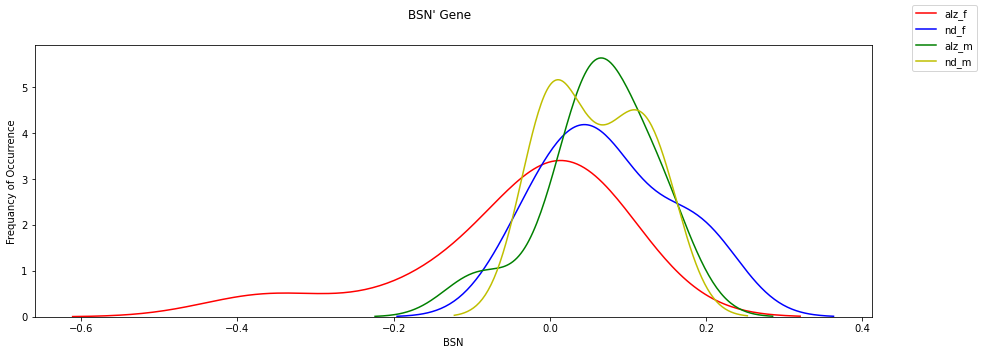

In [146]:
fig, axes = plt.subplots(figsize=(15, 5), sharey=True)
fig.suptitle("BSN' Gene")

from scipy.stats import norm
sn.distplot(alz_f.BSN, hist=False, color='r', label='alz_f',rug=False);#fit=norm
sn.distplot(nd_f.BSN, hist=False, color='b', label='nd_f',rug=False);#fit=norm
sn.distplot(alz_m.BSN, hist=False, color='g',label='alz_m' ,rug=False);#fit=norm
sn.distplot(nd_m.BSN, hist=False, color='y', label ='nd_m' ,rug=False);#fit=norm
fig.legend()

axes.set_xlabel('BSN')
axes.set_ylabel('Frequancy of Occurrence')
plt.show()

In [147]:
from scipy.stats import ttest_ind
def p_value(x,y):
    a , b = ttest_ind(x, y, equal_var=False)
    return b

def pvalue_vector(str_items, str_gene_name):
    dic  = {}
    for i in range(len(items)):
        for j in range(i+1,len(items)):
            dic[items[i]+' vs. '+items[j]] = p_value(eval(items[i]).eval(str_gene_name), eval(items[j]).eval(str_gene_name))
    return dic                                               

items = ['nd_f', 'alz_f', 'nd_m', 'alz_m']
gene_name = 'BSN'
dicBSN = pvalue_vector(items, gene_name)
ggBSN = pd.DataFrame.from_dict(dicBSN, orient='index', columns =['P Value']) #.set_index('xxx') row=['a','b','c','d','e','f'] orient='index',
ggBSN.index.name = 'Gene Comparison Group'
ggBSN.reset_index(['Gene Comparison Group'], inplace = True)
ggBSN['ID']=['a','b','c','d','e','f']
ggBSN.set_index('ID', inplace = True)
ggBSN[r"Significance Level $\alpha$"] = 0.05
ggBSN[r'Hypothesis $H0$'] = np.where(ggBSN.iloc[:,1] > 0.05, r'Failed to Reject H$_0$', r'Reject H$_0$' )
# alternatively you could use def with apply function in pd
ggBSN

,Gene Comparison Group,P Value,Significance Level $\alpha$,Hypothesis $H0$
ID,,,,
a,nd_f vs. alz_f,0.032165,0.05,Reject H$_0$
b,nd_f vs. nd_m,0.624137,0.05,Failed to Reject H$_0$
c,nd_f vs. alz_m,0.705590,0.05,Failed to Reject H$_0$
d,alz_f vs. nd_m,0.048856,0.05,Reject H$_0$
e,alz_f vs. alz_m,0.046863,0.05,Reject H$_0$
f,nd_m vs. alz_m,0.917958,0.05,Failed to Reject H$_0$


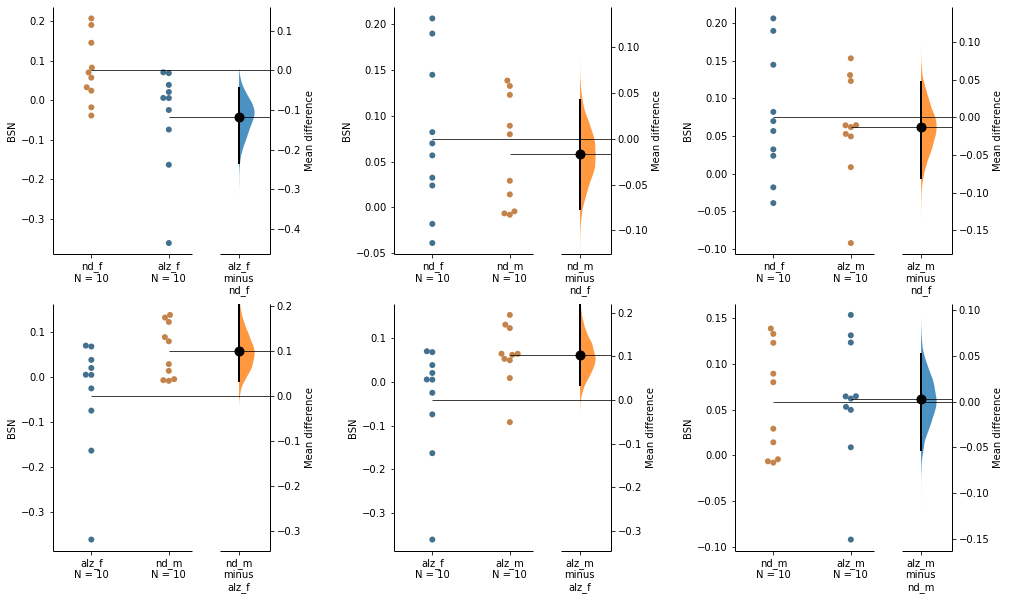

In [148]:
#two_groups_unpaired = dabest.load(df2, idx=("BSN", "Test 1")) #resamples=5000
import dabest
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot2grid((2,3),(0,0))
dm_dabest = dabest.load(df2, x="GSM_ID", y="BSN",  idx=("nd_f", "alz_f"))
dm_dabest.mean_diff.plot(ax=ax1);

ax2 = plt.subplot2grid((2,3),(0,1))
dm_dabest = dabest.load(df2, x="GSM_ID", y="BSN",  idx=("nd_f", "nd_m"))
dm_dabest.mean_diff.plot(ax=ax2);

ax3 = plt.subplot2grid((2,3),(0,2))
dm_dabest = dabest.load(df2, x="GSM_ID", y="BSN",  idx=("nd_f", "alz_m"))
dm_dabest.mean_diff.plot(ax=ax3);

ax4 = plt.subplot2grid((2,3),(1,0))
dm_dabest = dabest.load(df2, x="GSM_ID", y="BSN",  idx=("alz_f", "nd_m"))
dm_dabest.mean_diff.plot(ax=ax4);

ax5 = plt.subplot2grid((2,3),(1,1))
dm_dabest = dabest.load(df2, x="GSM_ID", y="BSN",  idx=("alz_f", "alz_m"))
dm_dabest.mean_diff.plot(ax=ax5);

ax6 = plt.subplot2grid((2,3),(1,2))
dm_dabest = dabest.load(df2, x="GSM_ID", y="BSN",  idx=("nd_m", "alz_m"))
dm_dabest.mean_diff.plot(ax=ax6);

plt.subplots_adjust(wspace=1.2)#hspace=0.6

In [149]:
P_value_sort = ggBSN.sort_values('P Value')
P_value_sort['Point Number'] = [i for i in range(1,7)]
P_value_sort

,Gene Comparison Group,P Value,Significance Level $\alpha$,Hypothesis $H0$,Point Number
ID,,,,,
a,nd_f vs. alz_f,0.032165,0.05,Reject H$_0$,1
e,alz_f vs. alz_m,0.046863,0.05,Reject H$_0$,2
d,alz_f vs. nd_m,0.048856,0.05,Reject H$_0$,3
b,nd_f vs. nd_m,0.624137,0.05,Failed to Reject H$_0$,4
c,nd_f vs. alz_m,0.705590,0.05,Failed to Reject H$_0$,5
f,nd_m vs. alz_m,0.917958,0.05,Failed to Reject H$_0$,6


Largest K below red line =  nan
P value BH corected =  nan


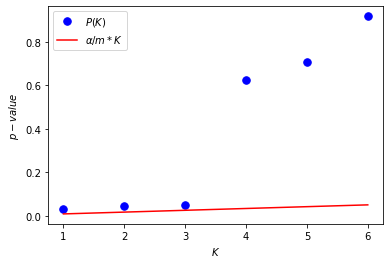

In [150]:
x = P_value_sort['Point Number']
def plt1():
    plt.plot(x,P_value_sort['P Value'], 'b.',markersize=15, label = r'$P(K)$')

    k = len(x)
    m = alpha = 0.05
    y_ = m/k*x
    PvalueBHcor = P_value_sort['P Value'].where(P_value_sort['P Value'].lt(y_)).max()
    Max_K_below_redline = x.where(P_value_sort['P Value'].lt(y_)).max()
    print('Largest K below red line = ', Max_K_below_redline)
    print('P value BH corected = ', PvalueBHcor)
    plt.plot(x, y_, 'r', label = r'$\alpha/m * K$')
    plt.xlabel('$\it{K}$');plt.ylabel('$\it {p-value}$')
    plt.legend();
    return (x,y_)

x, y_ = plt1()

In [151]:
Max_K_below_redline = x.where(P_value_sort['P Value'].lt(y_)).max()
print('Largest K below red line = ', Max_K_below_redline)

Largest K below red line =  nan


#### Step 6

In [152]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
Data_File_Path ='C:/Users/Owner/Documents/Majid/UConn/Data_Visualization/Data_file/'
Data_alzFe = pd.read_csv(Data_File_Path + 'GSE44768_CR_alz_female_reduced.csv')
s=Data_alzFe.iloc[0:4,10:].corr()
ds = s.where(~(np.triu(np.ones(s.shape)).astype(np.bool))).stack().sort_values(key=lambda x: abs(x), ascending=False)
ds.head()

SNAP91   GAB2    -0.999999
AMPD1    SFRS3    0.998962
BSN      TEKT1   -0.998861
SLC22A2  PCBP2    0.998575
RFX4     STON2    0.998226
dtype: float64

In [153]:
# After finding sorting, restrcture the collums names
ds=pd.DataFrame(ds).reset_index()
re_structure_ds = { 'Node1 Gene' : ds.level_0, 'Node2 Gene': ds.level_1, 'Corr Value': ds[0]}
dss = pd.DataFrame(re_structure_ds,columns=['Node1 Gene',  'Node2 Gene',  'Corr Value'])
dss.index = dss.index + 1
dss_50 = dss[0:50]
dss_50

,Node1 Gene,Node2 Gene,Corr Value
1,SNAP91,GAB2,-0.999999
2,AMPD1,SFRS3,0.998962
3,BSN,TEKT1,-0.998861
4,SLC22A2,PCBP2,0.998575
5,RFX4,STON2,0.998226
6,MED6,XIST,0.997893
7,EGR2,DOPEY1,-0.997360
8,ZIC2,GAB2,-0.996528
9,SNAP91,ZIC2,0.996410
10,TUBB4,RPS27,0.995534


#### Step 2

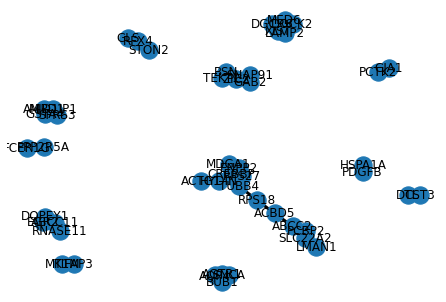

In [154]:
import networkx as nx
import matplotlib.pyplot as plt
G_n = nx.from_pandas_edgelist(dss_50,
source='Node1 Gene',
target='Node2 Gene',
edge_attr='Corr Value')
for i in range(1,len(dss_50['Node1 Gene'])):
    if dss_50['Corr Value'][i] > 0:
        G_n.add_edge(dss_50['Node1 Gene'][i],dss_50['Node2 Gene'][i], color='red')
    else:
        G_n.add_edge(dss_50['Node1 Gene'][i],dss_50['Node2 Gene'][i], color='green')
nx.draw(G_n, with_labels=True, width=3)
plt.show()

#### Step 3

In [155]:
from pyvis.network import Network
# create vis network
net = Network(notebook=True, width=1000, height=1000)  
net.from_nx(G_n)
net.show("Gene_network.html")